In [52]:
from pathlib import Path
import json
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [53]:
trials_dir = Path('trials', 'hyperband_resnet')
rows = []
for trial in sorted(list(trials_dir.glob('trial_*'))):
    with open(trial.joinpath('trial.json')) as f:
        results = json.load(f)
        row = {'score': results['score']} | results['hyperparameters']['values']
        rows.append(row)

trials_df = pd.DataFrame(rows).sort_values(by='score', ascending=False)
trials_df = trials_df[[c for c in trials_df.columns if 'tuner' not in c]]

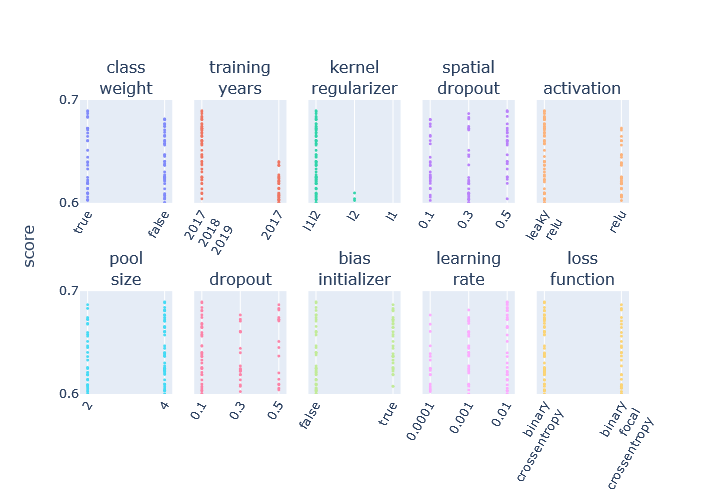

In [223]:
nrows, ncols = 2, 5
fig = make_subplots(
    rows=nrows, cols=ncols, shared_yaxes='all', y_title='score',
    subplot_titles=trials_df.columns[1:].str.replace('_', '<br>'),
    vertical_spacing=0.3,
)

for i, col in enumerate(trials_df.columns[1:]):
    if trials_df[col].dtype == object:
        x = trials_df[col].str.replace('_', '<br>')
    else:
        x = trials_df[col]

    position = dict(row=(i//ncols)+1, col=(i%ncols)+1)
    fig.append_trace(go.Scatter(
        y=trials_df['score'],
        x=x,
        mode='markers',
        marker_size=3,
        opacity=0.8,
    ), **position)
    fig.update_xaxes(
        type='log' if 'learning_rate' in col else None,
        tickformat='.1r',
        tickangle=-60,
        tickvals=x.unique(),
        **position
    )
    fig.update_yaxes(range=[0.6, 0.7], tickvals=[0.6, 0.7])

fig.update_layout(
    height=500, width=700, showlegend=False,
    margin=dict(l=80, r=80, t=100, b=80)
)
fig.show()

In [1]:
from tqdm.notebook import tqdm
from pathlib import Path
import numpy as np

In [7]:
sentinel_bands = [f'B{x}' for x in range(2, 9)] + ['B8A', 'B11', 'B12']

shards_dir = Path('/mnt', 'wsl', 'training_data', 'shards_previous')

for band_group in [["B3", "B8"], ["B6", "B11"]]:
    save_dir = shards_dir.joinpath(f'features_{"_".join(band_group)}_2017_2018_2019')
    save_dir.mkdir(exist_ok=True)
    shards = list(shards_dir.joinpath('features_201706').glob('feature_*.npy'))

    indices = [sentinel_bands.index(b) for b in band_group]

    for shard in tqdm(shards):
        np.save(
            save_dir.joinpath(f'{shard.stem}.npy'),
            np.load(shard)[..., indices]
        )

  0%|          | 0/250569 [00:00<?, ?it/s]

  0%|          | 0/250569 [00:00<?, ?it/s]

In [ ]:
# sentinel_bands = [f'B{x}' for x in range(2, 9)] + ['B8A', 'B11', 'B12']
# indices = [sentinel_bands.index(b) for b in ['B3', 'B8']]
# shards_dir = Path.home().joinpath('sentinel_data', 'shards')
# training_dir = Path.home().joinpath('/mnt', 'wsl', 'training_data', 'shards')

# for band_group in [["B3", "B8"], ["B6", "B11"]]:
#     save_dir = training_dir.joinpath(f'features_{"_".join(band_group)}_2017_2018_2019')
#     shards = []
#     for y in range(2017, 2020):
#         shards.append(list(
#             shards_dir
#             .joinpath(f'features_{"_".join(band_group)}_{y}')
#             .glob('feature_*.npy')
#         ))

#     for shard_a, shard_b, shard_c in tqdm(zip(*shards), total=len(shards[0])):
#         data = (np.load(shard_a)
#                 + np.load(shard_b) 
#                 + np.load(shard_c)
#                )/3
#         np.save(
#             save_dir.joinpath(f'feature_{shard_a.stem.split("_")[-1]}.npy'),
#             data
#         )


In [3]:
# import geemap
# import ee
# ee.Authenticate()
# ee.Initialize(project='sentinel-treeclassification')

[0.0876 0.1914]
[0.0857 0.1958]


In [5]:
import geopandas as gpd
gdf = gpd.read_file(Path('labels').joinpath('full_geometries.json'))
# gdf_points = gdf
# gdf_points.geometry = gdf_points.geometry.centroid

AttributeError: 'GeoDataFrame' object has no attribute 'joinpath'

In [ ]:
# df = pd.read_csv(Path('weather_data', 'era5_2020.csv'))
# df.interpolate(method='nearest')

In [ ]:
# for eval_year in [2017, 2020, 2021, 2022, 2023]:
    # eval_generator = DataGenerator(
        # utils.selected_classes.index, shuffle=False, year=eval_year, **params)
#     preds_path = model_dir.joinpath(f"preds_{params['year']}.npy")
#     if preds_path.is_file():
#         y_pred = np.load(preds_path)
#     else:
#         y_pred = model.predict(x=eval_generator, verbose=1)
#         np.save(preds_path, y_pred)

#     y_true = utils.selected_classes.iloc[:y_pred.shape[0]].to_numpy()
#     cm = confusion_matrix(y_true.flatten(), (y_pred > 0.5).flatten().astype(int))
#     plot = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
#     display(plot)

In [ ]:
from glob import glob
from json import load
from pathlib import Path

summation = 0
notebooks = list(Path('.').glob('*.ipynb')) + list(Path('old_notebooks').glob('*.ipynb'))
for f in notebooks:
    if 'test' in str(f):
        continue
    cells = load(open(f))["cells"]
    summation += sum(len(c["source"]) for c in cells)
    
for f in Path('.').glob('*.py'):
    summation += sum(1 for _ in open(f))
    
print(summation)

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass